<a href="https://colab.research.google.com/github/Swastik02aug/almabetter-EDA-project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
#importing all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
# initialising path for file
file_path_1='/content/drive/MyDrive/EDA PROJECT/Play Store Data.csv'
file_path_2='/content/drive/MyDrive/EDA PROJECT/User Reviews.csv'

In [90]:
#reading csv files
psd=pd.read_csv(file_path_1)
ur=pd.read_csv(file_path_2)

In [15]:
# here we get the data type of psd data frame
type(psd)

pandas.core.frame.DataFrame

In [33]:
# here we get the data type in in each columns
psd.dtypes

In [34]:
# here we find no. of unique values in columns
psd.nunique()

In [35]:
#  here we finding the null places in each column
psd.isnull().sum()

In [93]:
'''                                              here we cleaning data,null value by some required specifics values                        '''


# on the basis of above data now we can clean the data

# as from data there are only one missing data in type so we replace the misssing place with free
psd['Type'].fillna("Free", inplace = True)

#in content rating there is one  missing place, we can't replce  the any other random value so its beneficial for us to drop the this row
psd.dropna(subset = ['Content Rating'], inplace=True)

# there are some columns also,whose requiement is also not reqiured for data analysis so it is better to drop that columns
psd.drop(['Last Updated'], axis=1, inplace=True)

# there are also null value in current and android version
psd['Current Ver'] =psd['Current Ver'].replace({np.nan:'not available'})
psd['Android Ver'] =psd['Android Ver'].replace({np.nan:'not available'})
psd['Rating'] =psd['Rating'].replace({np.nan:0})


In [94]:
# here we checking the psd data columns whose contains only int values or float values
psd.describe()

,Rating
count,10840.000000
mean,3.621771
std,1.514563
min,0.000000
25%,3.700000
50%,4.200000
75%,4.500000
max,5.000000


In [95]:
# again we check data for null values and hence there all cleaning of dat is done 
psd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
dtype: int64

In [107]:
'''                         Now we covert the data types a/c to its requirement(Rating	Reviews 	Size  Installs  Price)    '''
# hence reviews contains int and floats ,we convert all in int.
psd['Reviews']=psd['Reviews'].astype(int)


In [100]:
#here we checking the size columns ,that what are types of values it contain a/c to that we remove or replace data and than converted to other data type
psd['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [101]:

#size contains various types of symbols,so we have to remove it ,after that we can change data type
psd['Size'] = psd.Size.apply(lambda x: x.strip('+'))

#  removing the `,`
psd['Size'] = psd.Size.apply(lambda x: x.replace(',', ''))

# converting the M to Mega
psd['Size'] = psd.Size.apply(lambda x: x.replace('M', 'e+6'))

# convertinf the K to Kilo
psd['Size'] = psd.Size.apply(lambda x: x.replace('k', 'e+3'))

# removing string by null values
psd['Size'] = psd.Size.replace('Varies with device', np.NaN)

# Converting the string to Numeric type
psd['Size'] = pd.to_numeric(psd['Size'])

# finally we drop the null value rows
psd.dropna(subset = ['Size'], inplace=True)

In [102]:
# here we checking install columns we that that is contains some symbol(+ and ,)
psd['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10835            10+
10836         5,000+
10837           100+
10838         1,000+
10840    10,000,000+
Name: Installs, Length: 9145, dtype: object

In [103]:
#here we removing (+)
psd['Installs'] = psd.Installs.apply(lambda x: x.strip('+'))
#here we replacing (, by space)
psd['Installs'] =psd.Installs.apply(lambda x: x.replace(',', ''))
# here we convert the data type 
psd['Installs']=psd['Installs'].astype(int)

In [104]:
# here we checking  data of price columns,and it conatin($) symbols
psd['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10835    0
10836    0
10837    0
10838    0
10840    0
Name: Price, Length: 9145, dtype: object

In [113]:
#here we remove '$' symbol from price
psd['Price'] = psd.Price.apply(lambda x: x.strip('$'))

# now here we convert the datatype of price
psd['Price']=psd['Price'].astype(float)

In [114]:
#now each columns are coverted into specified data types
psd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Current Ver     9145 non-null   object 
 11  Android Ver     9145 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 928.8+ KB


In [115]:
psd.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,3.527578,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,1.590804,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,0.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,3.600000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.200000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [116]:
#by using function '.head()' we display the first five rows with all columns
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [117]:
#by using function '.tail()' we display the last five rows with all columns
psd.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
10835,FR Forms,BUSINESS,0.0,0,9600000.0,10,Free,0.0,Everyone,Business,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9500000.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,10000000,Free,0.0,Everyone,Lifestyle,Varies with device,Varies with device


In [118]:
# '.columns' is use to give all name in a list
psd.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'],
      dtype='object')

In [119]:
#'.shape' is used to give information about numbers of rows and columns as (rows,columns)
psd.shape

(9145, 12)

  QUESTION.1:Find the no. of apps in each category ?

---



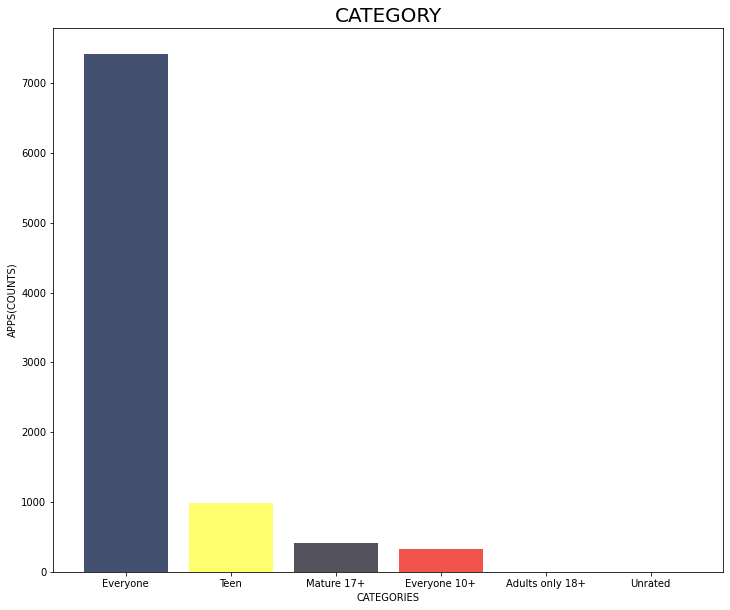

In [122]:
#code
# here we no. of apps lies in each  categories
psd['Category'].value_counts()
x2 = psd['Content Rating'].value_counts().index
y2 = psd['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

#plot
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('CATEGORY',size = 20);
plt.ylabel('APPS(COUNTS)');
plt.xlabel('CATEGORIES');    


QUESTION.2:Categorise the apps b/w paid and free apps?

In [ ]:
#code

QUESTION.3:Categorise the apps on the basis of their sizes?

In [ ]:
#code

QUESTION.4:Find the over all top rated app on play store with maxmum revives?

In [ ]:
#code

QUESTION.5:Categorise the app on the basis of content rating and numbers of installations?

In [ ]:
#code

QUESTION.6:Print top 5 in each genere categories with Last Updated,	Current Ver,	Android Ver?

In [ ]:
#code

In [10]:
# user revives top 5 rows
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [11]:
# user revives data frame size
ur.shape

(64295, 5)

QUESTION.7:Find the top all app with sentiment polarity 1 ?

In [ ]:
#code

QUESTION.8:Find all the with positive sentiment?

In [ ]:
#code

QUESTION.9:Categorised the app on the basis of Sentiment_Subjectivity?

In [ ]:
#code